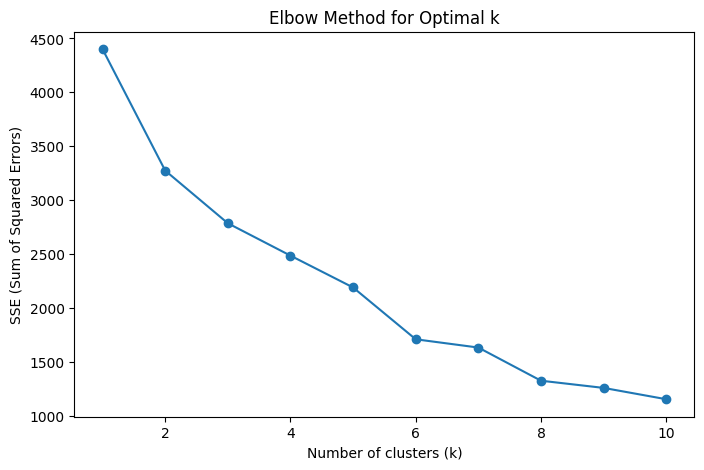

K-means Silhouette Score: 0.30045845653503633


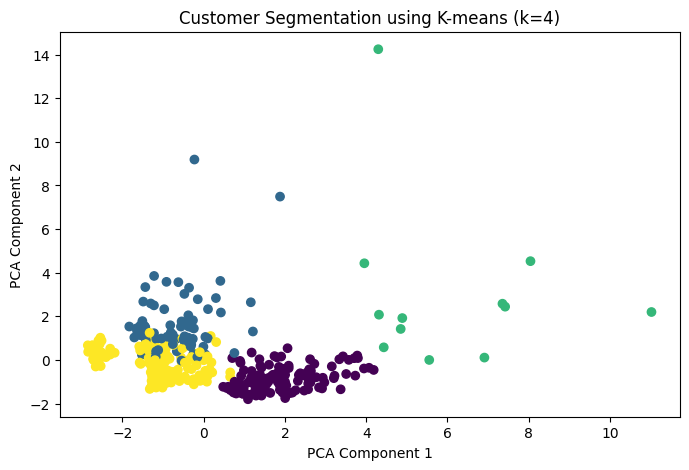

DBSCAN Silhouette Score: 0.022969282323238853


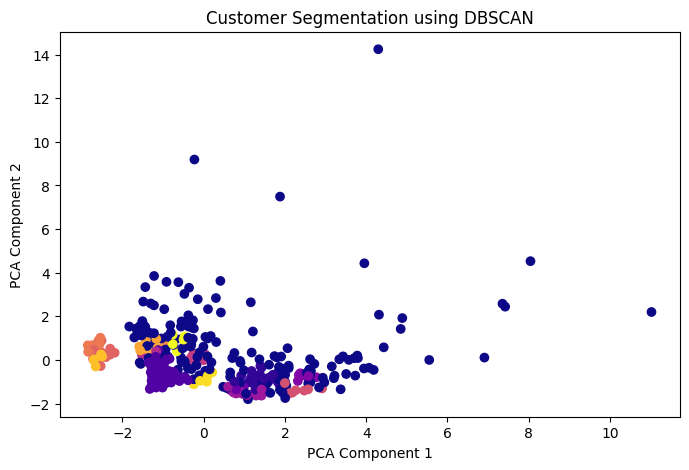

Agglomerative Clustering Silhouette Score: 0.3731766645775507


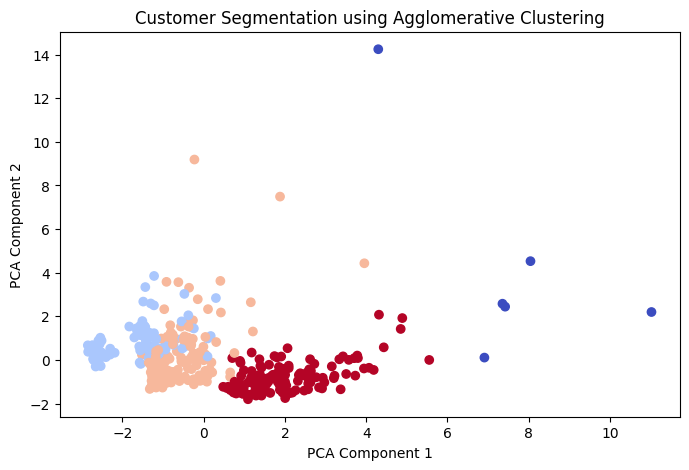

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,DBSCAN_Cluster,Agglomerative_Cluster
0,2,3,12669,9656,7561,214,2674,1338,0,0,3
1,2,3,7057,9810,9568,1762,3293,1776,0,0,3
2,2,3,6353,8808,7684,2405,3516,7844,0,-1,3
3,1,3,13265,1196,4221,6404,507,1788,3,1,2
4,2,3,22615,5410,7198,3915,1777,5185,0,-1,3


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('Wholesale customers data.csv')

# Check for missing values and handle them
df.fillna(df.mean(), inplace=True)

# Feature scaling (normalizing the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Apply PCA to reduce dimensionality to 2 components for better clustering and visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# K-means clustering with optimal k (using elbow method)
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# From the plot, let's assume the optimal k is 4
optimal_k = 4

# K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add the K-means cluster labels to the dataframe
df['KMeans_Cluster'] = kmeans_labels

# Evaluate K-means using silhouette score
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")

# Visualize K-means clusters using PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Customer Segmentation using K-means (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# DBSCAN clustering with parameter tuning
# Trying different values for eps and min_samples
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add the DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Evaluate DBSCAN using silhouette score
dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Visualize DBSCAN clusters using PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Agglomerative Clustering (hierarchical clustering)
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(scaled_df)

# Add the Agglomerative Clustering labels to the dataframe
df['Agglomerative_Cluster'] = agglo_labels

# Evaluate Agglomerative Clustering using silhouette score
agglo_silhouette = silhouette_score(scaled_df, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

# Visualize Agglomerative Clustering using PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo_labels, cmap='coolwarm')
plt.title('Customer Segmentation using Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Display the first few rows of the final dataset with cluster labels
df.head()
